Install gensim

In [15]:
# pip install gensim
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from gensim.models import Word2Vec

In [17]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "I like eating apples and bananas.",
    "Natural language processing is a fascinating field."
    ]

In [18]:
from nltk.tokenize import word_tokenize

In [19]:
final_data = []
for sent in sentences:
  final_data.append(word_tokenize(sent))

In [20]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [33]:
#create the object
model = Word2Vec(final_data, min_count=1, vector_size=10)

In [34]:
Word2Vec?

In [35]:
model.wv['apples'], model.wv['bananas']

(array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
         0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
       dtype=float32),
 array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
         0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
       dtype=float32))

In [37]:
def get_embedding(word):
  try:
    word_embedding = model.wv[word]
    return f" '{word}' : {word_embedding}"
  except KeyError:
    return f"'{word}' not found in vocabulary"

In [38]:
get_embedding('lazy')

" 'lazy' : [ 0.01631345  0.00190534  0.03474035  0.00217268  0.09621755  0.05061922\n -0.08919783 -0.07041954  0.00900842  0.06394785]"

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
cosine_similarity(model.wv['apples'].reshape(1, -1), model.wv['bananas'].reshape(1, -1))

array([[0.18977958]], dtype=float32)

In [44]:
cosine_similarity(model.wv['bananas'].reshape(1, -1), model.wv['fox'].reshape(1, -1))

array([[0.5916882]], dtype=float32)

In [45]:
nltk.download('abc')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.


True

In [46]:
from nltk.corpus import abc

In [47]:
sents = abc.sents()

In [48]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [49]:
model = Word2Vec(sents, min_count=1, vector_size=10)

In [61]:
model.wv.most_similar('wheat')

[('export', 0.9683692455291748),
 ('beef', 0.9582692980766296),
 ('grain', 0.9532996416091919),
 ('revived', 0.9478087425231934),
 ('Sahara', 0.9437425136566162),
 ('set', 0.9235950708389282),
 ('wool', 0.9181177020072937),
 ('shortfall', 0.9164877533912659),
 ('Voodoo', 0.9142654538154602),
 ('exports', 0.9133617877960205)]

In [56]:
# unique words from the sentences are indexed
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [63]:
model.wv['science'], model.wv['publisher']

(array([ 0.14466502,  0.1471777 ,  2.3013785 ,  0.05551259, -0.37016815,
        -0.6017847 ,  1.7222041 ,  1.1309962 , -1.3893516 , -0.40035868],
       dtype=float32),
 array([-0.00056974, -0.01210172,  0.2170069 ,  0.02537533, -0.08170849,
        -0.07359992,  0.1601624 ,  0.04758127, -0.1613312 , -0.06127593],
       dtype=float32))

In [68]:
import json
with open('/content/drive/MyDrive/Colab Notebooks/intents.json') as f:
  data = json.load(f)
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [71]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [72]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [74]:
import pandas as pd
df = pd.DataFrame(data)
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [75]:
df['patterns'] = df['patterns'].apply(', '.join)

In [76]:
df

,tag,patterns,responses
0,welcome,"Hi, How are you, Is any one to talk?, Hello, h...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"Bye, See you later, Goodbye, I will come back ...","[See you later, thanks for visiting, have a gr..."
2,thankful,"Thanks for helping me, Thank your guidance, Th...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"What hours are you open?, Tell your opening ti...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"Can I pay using credit card?, Can I pay using...","[We accept VISA, Mastercard and credit card, W..."


In [77]:
df['responses'] = df['responses'].apply(', '.join)

In [78]:
df

,tag,patterns,responses
0,welcome,"Hi, How are you, Is any one to talk?, Hello, h...","Hello, thanks for contacting us, Good to see y..."
1,goodbye,"Bye, See you later, Goodbye, I will come back ...","See you later, thanks for visiting, have a gre..."
2,thankful,"Thanks for helping me, Thank your guidance, Th...","Happy to help!, Any time!, My pleasure, It is ..."
3,hoursopening,"What hours are you open?, Tell your opening ti...","We're open every day 8am-7pm, Our office hours..."
4,payments,"Can I pay using credit card?, Can I pay using...","We accept VISA, Mastercard and credit card, We..."


In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [81]:
from nltk.corpus import stopwords
from textblob import Word
stop = stopwords.words('english')

In [84]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [89]:
import string

df['patterns'] = df['patterns'].apply(lambda x: " ".join(x.lower() for x in word_tokenize(x)))

df['patterns'] = df['patterns'].apply(lambda x: " ".join(x for x in word_tokenize(x) if x not in string.punctuation))

df['patterns'] = df['patterns'].str.replace("[^\w\s]", '')

df['patterns'] = df['patterns'].apply(lambda x: " ".join(x for x in word_tokenize(x) if not x.isdigit()))

df['patterns'] = df['patterns'].apply(lambda x: " ".join(x for x in word_tokenize(x) if not x in stop))

df['patterns'] = df['patterns'].apply(lambda x: " ".join(Word(word).lemmatize(pos='v') for word in word_tokenize(x)))


In [90]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"Hello, thanks for contacting us, Good to see y..."
1,goodbye,bye see later goodbye come back soon,"See you later, thanks for visiting, have a gre..."
2,thankful,thank help thank guidance 's helpful kind,"Happy to help!, Any time!, My pleasure, It is ..."
3,hoursopening,hour open tell open time open time please,"We're open every day 8am-7pm, Our office hours..."
4,payments,pay use credit card pay use mastercard pay use...,"We accept VISA, Mastercard and credit card, We..."


In [91]:
w = Word('playing')

In [92]:
w.lemmatize(pos='v')

'play'

In [93]:
# taking the outer list
bigger_list = []
for sublist in df['patterns']:
    sublist_1 = sublist.split()
    bigger_list.append(sublist_1)

In [94]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hour', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [100]:
# custom data is fed to machine for further processing
model = Word2Vec(bigger_list, min_count=1, vector_size=2)
model

In [113]:
model.wv['hi'], model.wv['hello']

(array([0.32294363, 0.4486494 ], dtype=float32),
 array([-0.22683066,  0.32770258], dtype=float32))

In [102]:
model.wv.most_similar('hi')

[('open', 0.9940898418426514),
 ('tell', 0.9916796088218689),
 ('bye', 0.9427580833435059),
 ('soon', 0.8170916438102722),
 ('goodbye', 0.7060585618019104),
 ('see', 0.6722856760025024),
 ('thank', 0.40620356798171997),
 ('hello', 0.33483967185020447),
 ('hour', 0.2708069384098053),
 ('card', 0.13995957374572754)]

In [103]:
model.wv.key_to_index.keys()

dict_keys(['pay', 'open', 'use', 'hi', 'time', 'thank', 'hello', 'talk', 'soon', 'one', 'bye', 'see', 'later', 'goodbye', 'come', 'back', 'available', 'cash', 'help', 'mastercard', "'s", 'helpful', 'kind', 'hour', 'tell', 'please', 'credit', 'card', 'guidance'])

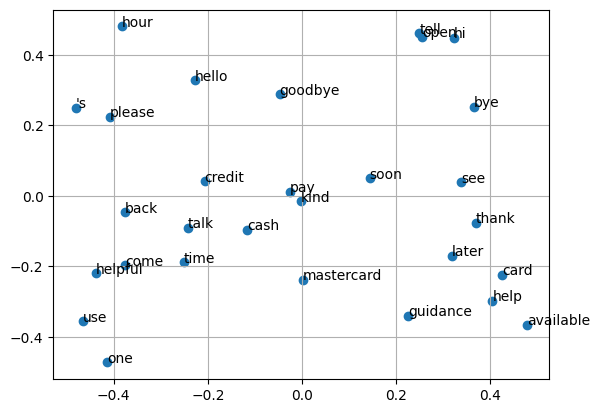

In [117]:
#plot a scatterplot and annotate model.wv.key_to_index.keys()
import matplotlib.pyplot as plt
df = pd.DataFrame(model.wv.key_to_index.keys())
df['X'] = df[0].apply(lambda x: model.wv[x][0])
df['Y'] = df[0].apply(lambda x: model.wv[x][1])
plt.scatter(df['X'], df['Y'])
for i, txt in enumerate(df[0]):
    plt.annotate(txt, (df['X'][i], df['Y'][i]))
plt.grid()
plt.show()

In [122]:
model.wv.most_similar('tell', topn=3)

[('open', 0.9997936487197876),
 ('hi', 0.9916796088218689),
 ('bye', 0.8919852375984192)]

In [128]:
dissimilar_words = model.wv.doesnt_match("see you later, thanks for visiting".split())
print(dissimilar_words)

see
